<a href="https://colab.research.google.com/github/Frankocean7/GSB-521/blob/main/GSB521_Group_Project_(Use_this_copy)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Professor Pierce's analysis, we can see that the majority of households earning over $200k were Democratic districts. 

Hypothesis: We wanted to test our hypothesis that among those districts, the 25-44 age group has more households earning more than $200k than the 44-65 age group.

In [78]:
#notbook has to have to the analysis (in support or not supposting our hypothesis)

#Links for definition of "Householder"
#https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html#:~:text=is%20not%20related.-,Householder,%2C%20boarders%2C%20or%20paid%20employees.
#https://www2.census.gov/programs-surveys/acs/tech_docs/user_notes/Family_Equalization_2006.pdf


# We begin by importing our libraries and the ACS Household data. 

In [79]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas


In [80]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like.
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_002E,B19001_017E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)

# storing the JSON response from url in data
data_json = json.loads(response.read())
data_json.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.

# Hand populate the columns based on the variable descriptions census.gov documents here: https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total Households','Less than $10k', '$200k+', 'State code', 'district number']

acs_df = pd.DataFrame(data_json, columns = cols)

# time to do some basic cleanup of the data. We will need to extract the district number and state in a regular format so we can later join with the party data.
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number']) #Turn state into a numeric 

acs_df['State'] = acs_df['State'].str.strip() # Strips the white space 

# Let's just keep the columns we need
acs_df = acs_df[['Total Households', 'Less than $10k', "$200k+", 'district number', 'State']]

# take a look at the top results in the dataset
acs_df.head() #Looks at the top 5 of the data 

,Total Households,Less than $10k,$200k+,district number,State
0,289474,14153,19390,10,Michigan
1,299804,23793,10899,4,Mississippi
2,278057,27728,19574,14,Michigan
3,306685,19036,12208,1,Michigan
4,285554,26481,12412,3,Mississippi


In [81]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["Less than $10k"] = pd.to_numeric(acs_df["Less than $10k"])
acs_df['$200k+'] = pd.to_numeric(acs_df['$200k+'])

# Compute some new columns based on the existing columns for later visualization
acs_df['% of households over $200k'] = (100*acs_df['$200k+'])/acs_df['Total Households']
acs_df['% of households less than $10k'] = (100*acs_df['Less than $10k'])/acs_df['Total Households'] 

# now let's look at the data again
acs_df.head()

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k
0,289474,14153,19390,10,Michigan,6.698356,4.889213
1,299804,23793,10899,4,Mississippi,3.635375,7.936185
2,278057,27728,19574,14,Michigan,7.039564,9.972056
3,306685,19036,12208,1,Michigan,3.980632,6.207020
4,285554,26481,12412,3,Mississippi,4.346638,9.273552


# Importing ACS Housholder data 

In [82]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like. 

url2 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19037_001E,B19037_002E,B19037_019E,B19037_036E&for=congressional%20district:*&in=state:*"

response2 = urlopen(url2)

data_json2 = json.loads(response2.read())
data_json2.pop(0)


['NAME',
 'B19037_001E',
 'B19037_002E',
 'B19037_019E',
 'B19037_036E',
 'state',
 'congressional district']

In [83]:
cols2 =  ['District Name','Total Households','Householder under 25','Householder 25 to 44','Householder 44 to 65','State code','district number'] 

acs_df2 = pd.DataFrame(data_json2,columns=cols2)

acs_df2[['District', 'State']] = acs_df2['District Name'].str.split(',', expand=True)
acs_df2['district number'] = pd.to_numeric(acs_df2['district number'])

acs_df2['State'] = acs_df2['State'].str.strip() # Strips the white space


# Keeping the columns we need
acs_df2 = acs_df2[['Total Households','Householder under 25','Householder 25 to 44','Householder 44 to 65','State','district number']]

# Looking at the top 5 of our data
acs_df2.head()  


,Total Households,Householder under 25,Householder 25 to 44,Householder 44 to 65,State,district number
0,289474,7242,79258,116959,Michigan,10
1,299804,10513,95489,110749,Mississippi,4
2,278057,6806,91322,101709,Michigan,14
3,306685,11400,75716,108782,Michigan,1
4,285554,12516,87665,103129,Mississippi,3


In [84]:
# Converting data into numeric.
acs_df2["Total Households"] = pd.to_numeric(acs_df2["Total Households"])
acs_df2["Householder under 25"] = pd.to_numeric(acs_df2["Householder under 25"])
acs_df2["Householder 25 to 44"] = pd.to_numeric(acs_df2["Householder 25 to 44"])
acs_df2["Householder 44 to 65"] = pd.to_numeric(acs_df2["Householder 44 to 65"])

# Compute some new columns based on the existing columns for later visualization
acs_df2['% of householder under 25'] = (100*acs_df2['Householder under 25'])/acs_df2['Total Households']
acs_df2['% of Householder 25 to 44'] = (100*acs_df2['Householder 25 to 44'])/acs_df2['Total Households']
acs_df2['% of Householder 44 to 65'] = (100*acs_df2['Householder 44 to 65'])/acs_df2['Total Households']

# Sanity checking data 
acs_df2.head()


,Total Households,Householder under 25,Householder 25 to 44,Householder 44 to 65,State,district number,% of householder under 25,% of Householder 25 to 44,% of Householder 44 to 65
0,289474,7242,79258,116959,Michigan,10,2.501779,27.380006,40.403974
1,299804,10513,95489,110749,Mississippi,4,3.506624,31.850476,36.940468
2,278057,6806,91322,101709,Michigan,14,2.447700,32.842906,36.578471
3,306685,11400,75716,108782,Michigan,1,3.717169,24.688524,35.470271
4,285554,12516,87665,103129,Mississippi,3,4.383059,30.699973,36.115411


#Importing Congressional data

In [85]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


#Check if each dataset is correct

In [86]:
party_df['State'].value_counts()


California                  53
Texas                       36
New York                    27
Florida                     27
Pennsylvania                18
Illinois                    18
Ohio                        16
Michigan                    14
Georgia                     14
North Carolina              13
New Jersey                  12
Virginia                    11
Washington                  10
Indiana                      9
Arizona                      9
Tennessee                    9
Massachusetts                9
Minnesota                    8
Missouri                     8
Maryland                     8
Wisconsin                    8
Colorado                     7
Alabama                      7
South Carolina               7
Louisiana                    6
Kentucky                     6
Oklahoma                     5
Oregon                       5
Connecticut                  5
Nevada                       4
Kansas                       4
Arkansas                     4
Iowa    

In [87]:
acs_df['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

In [88]:
acs_df2['State'].value_counts()

California              53
Texas                   36
Florida                 27
New York                27
Illinois                18
Pennsylvania            18
Ohio                    16
Georgia                 14
Michigan                14
North Carolina          13
New Jersey              12
Virginia                11
Washington              10
Indiana                  9
Massachusetts            9
Arizona                  9
Tennessee                9
Missouri                 8
Wisconsin                8
Minnesota                8
Maryland                 8
South Carolina           7
Alabama                  7
Colorado                 7
Kentucky                 6
Louisiana                6
Connecticut              5
Oklahoma                 5
Oregon                   5
Iowa                     4
Kansas                   4
Arkansas                 4
Mississippi              4
Nevada                   4
Utah                     4
New Mexico               3
West Virginia            3
N

In [89]:
# Merge is like a sql natural join. We are joining on the State and District numbers being the same between the two sets. Similar to natural join.
merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

#Merging all 3 datasets

In [90]:
from pandas.core.reshape.merge import merge
# merged_df = pd.merge(acs_df, party_df, on=["State", "district number"])

merge3 = merge(merged_df,acs_df2)


# Checking  if datasets merged correctly

In [91]:
merge3.describe()

,Total Households,Less than $10k,$200k+,district number,% of households over $200k,% of households less than $10k,Householder under 25,Householder 25 to 44,Householder 44 to 65,% of householder under 25,% of Householder 25 to 44,% of Householder 44 to 65
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,292471.643678,17605.977011,28522.944828,10.158621,9.721602,6.050237,10976.190805,96035.970115,106797.050575,3.710547,32.773829,36.656814
std,33670.787672,6047.931263,18902.411362,10.656779,6.417955,2.106075,5285.902826,19976.301970,11736.923107,1.653365,4.955352,2.941779
min,183319.000000,6021.000000,5296.000000,0.000000,2.025905,2.208934,1052.000000,56953.000000,69556.000000,0.431515,17.436232,28.002983
25%,273747.000000,13416.000000,14916.000000,3.000000,5.184740,4.653305,6995.000000,82025.500000,99416.500000,2.481105,29.587775,34.740371
50%,292311.000000,16617.000000,22543.000000,6.000000,7.618205,5.679285,10450.000000,92368.000000,107633.000000,3.506624,32.433392,36.551905
75%,311849.500000,21013.500000,37009.500000,13.000000,12.689262,7.036059,14080.500000,106510.000000,113821.000000,4.731970,35.595675,38.533652
max,448949.000000,44929.000000,111988.000000,53.000000,41.846370,16.858153,32827.000000,178555.000000,150792.000000,10.363007,47.313639,46.023767


There are 435 total rows, which matches up with the number of congress members in the 116th congress. 

In [92]:
merge3['Party'].value_counts()

D    233
R    201
L      1
Name: Party, dtype: int64

# Exploritory analysis to test our hypothesis.

Let's do our visualization now. We will do a scatter plot of congressional districts and look at the % of households earning over 200k and
10k on the other axis. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress.

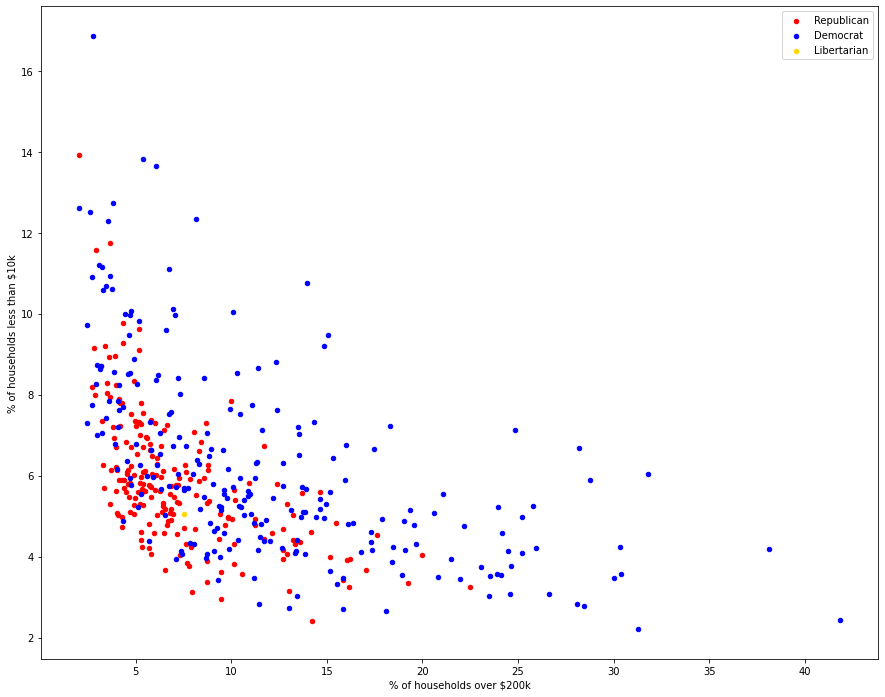

In [93]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households over $200k', y='% of households less than $10k', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households over $200k', y='% of households less than $10k',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households over $200k', y='% of households less than $10k',c='gold',label='Libertarian', ax=ax)

#for i, txt in enumerate(df['State']):
#   ax.annotate(txt, (df['% of households over $200k'].iat[i], df['% of households less than $10k'].iat[i]))

plt.legend()
plt.show()

We'll begin by looking at the percentage of households that earn over $200k and their householder is under the age of 25.

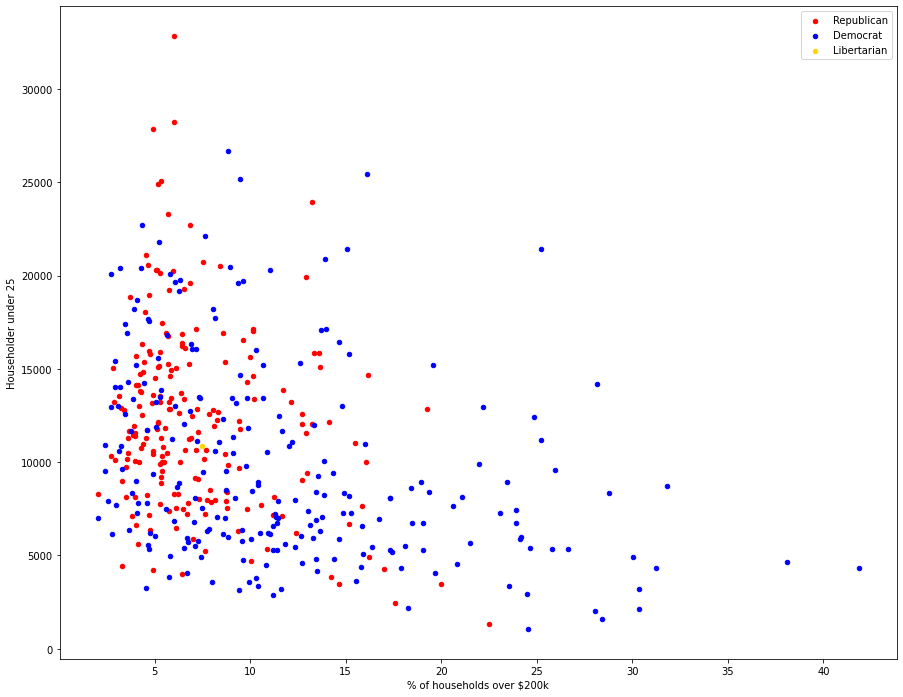

In [94]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households over $200k', y='Householder under 25', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households over $200k', y='Householder under 25',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households over $200k', y='Householder under 25',c='gold',label='Libertarian', ax=ax)


Percentage of households earning over $200k and their householder  is between the ages of 25 to 44. 

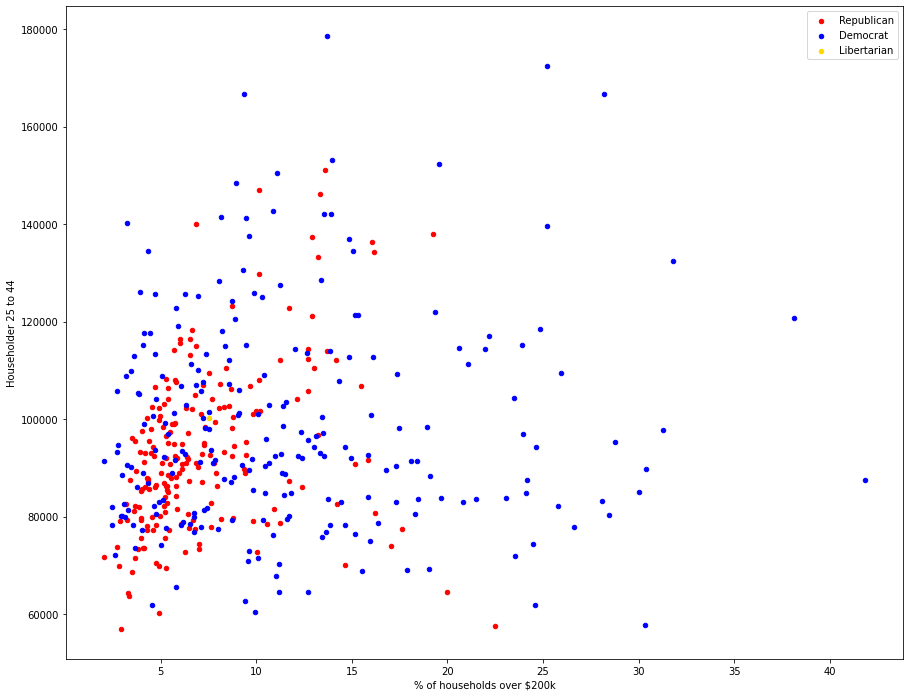

In [95]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]


fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households over $200k', y='Householder 25 to 44', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households over $200k', y='Householder 25 to 44',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households over $200k', y='Householder 25 to 44',c='gold',label='Libertarian', ax=ax)




Percentage of households earning over $200k and their householder is between the ages of 44 to 65. 

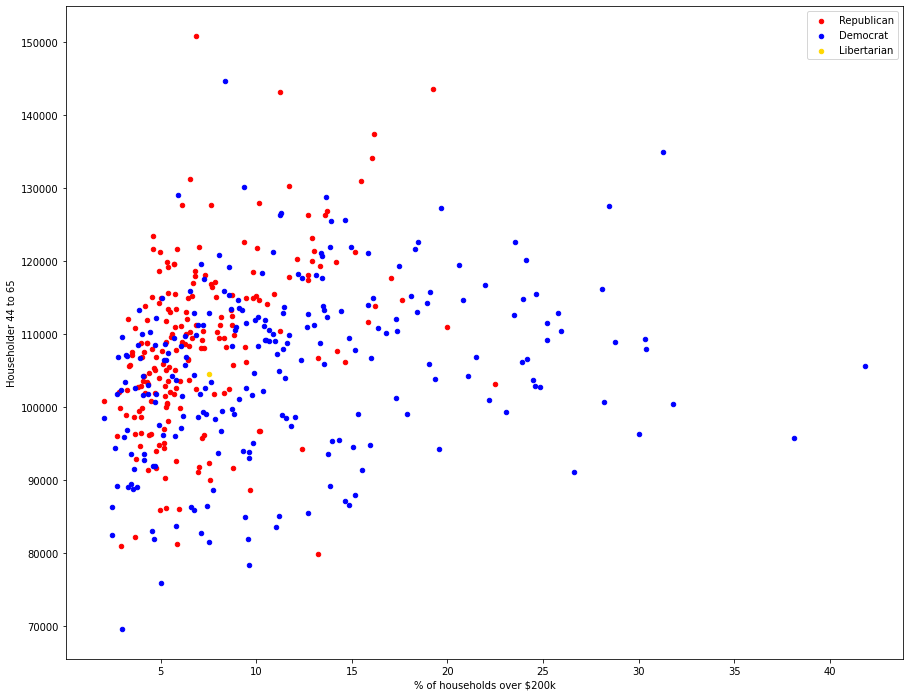

In [96]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]


fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households over $200k', y='Householder 44 to 65', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households over $200k', y='Householder 44 to 65',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households over $200k', y='Householder 44 to 65',c='gold',label='Libertarian', ax=ax)



Next, we look percentages of households that earn less than 10k and their householder is under the age of 25.

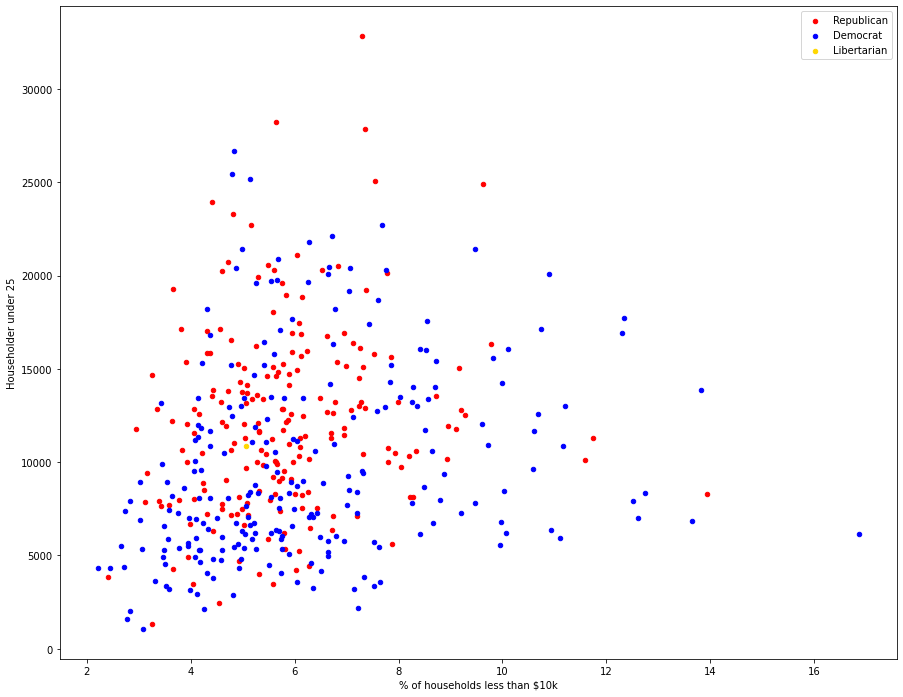

In [97]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households less than $10k', y='Householder under 25', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households less than $10k', y='Householder under 25',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households less than $10k', y='Householder under 25',c='gold',label='Libertarian', ax=ax)

#R.plot.scatter(x='Householder 44 to 65', y='% of households less than $10k', c='red',label='Republican', ax=ax)
#D.plot.scatter(x='Householder 44 to 65', y='% of households less than $10k',c='blue',label='Democrat', ax=ax)
#L.plot.scatter(x='Householder 44 to 65', y='% of households less than $10k',c='gold',label='Libertarian', ax=ax)

Percentage of households earning less than 10k and their householder is between the ages of 25 to 44.

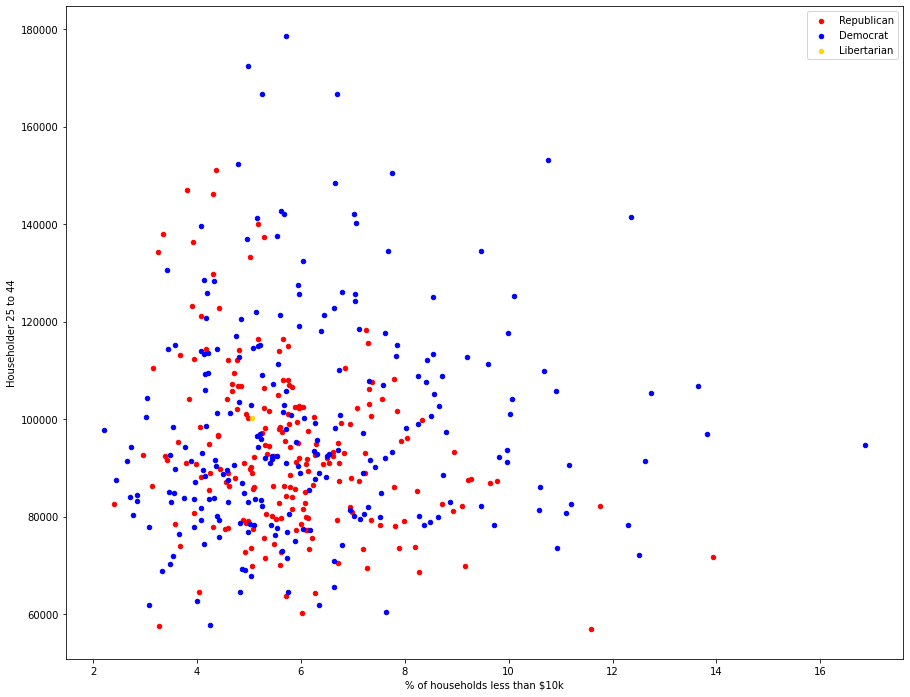

In [98]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households less than $10k', y='Householder 25 to 44', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households less than $10k', y='Householder 25 to 44',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households less than $10k', y='Householder 25 to 44',c='gold',label='Libertarian', ax=ax)

Lastly, we looked at households earning less than 10k and their householder is between the ages of 44 to 65. 

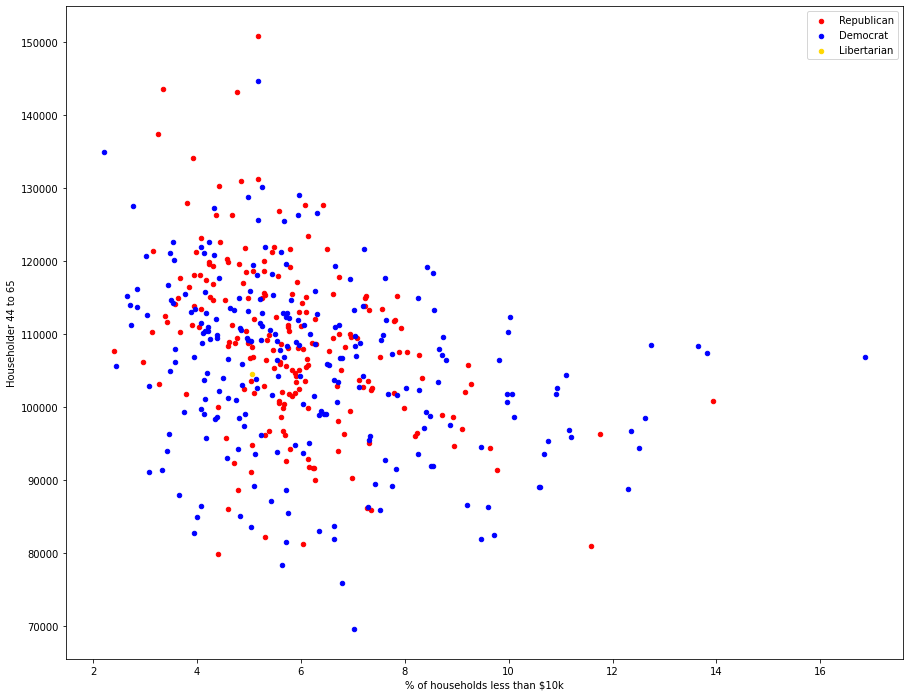

In [99]:
R = merge3[merge3['Party'].str.contains('R')]
D = merge3[merge3['Party'].str.contains('D')]
L = merge3[merge3['Party'].str.contains('L')]


fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of households less than $10k', y='Householder 44 to 65', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of households less than $10k', y='Householder 44 to 65',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of households less than $10k', y='Householder 44 to 65',c='gold',label='Libertarian', ax=ax)

Conclusion: Based on our analysis we found that their is no correlation between the age of a householder and household income. 